# Regressió lineal:

In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
Y = 4 + 3*X + np.random.randn(100,1)

print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 100


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

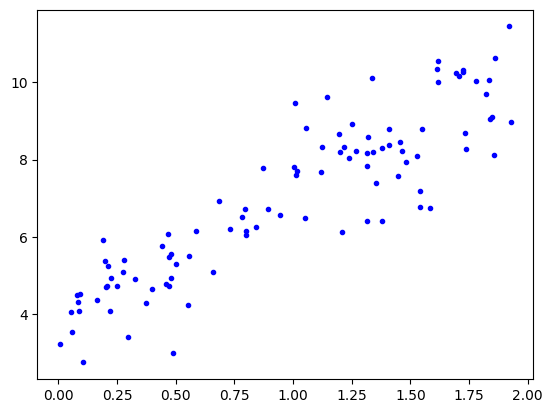

In [3]:
plt.plot(X,Y,"b.")
plt.show()

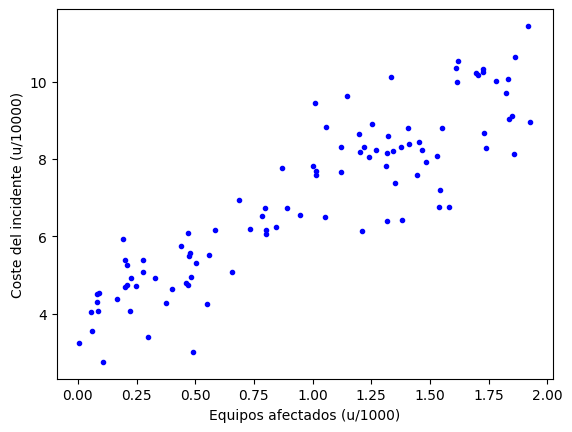

In [4]:
plt.plot(X,Y,"b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

## Modifiquem el conjunt de dades

In [5]:
import pandas as pd

data = {'n_equipos_afectados':X.flatten(),'coste':Y.flatten()}
df = pd.DataFrame(data)
df.head(10)

C:\Users\tvive\AppData\Local\Temp\ipykernel_30108\559735878.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,n_equipos_afectados,coste
0,0.801295,6.161666
1,1.408055,8.802034
2,0.374669,4.285809
3,0.784497,6.523526
4,1.919262,11.442173
5,1.616104,10.000138
6,0.298533,3.398244
7,1.002259,7.814928
8,0.844003,6.243306
9,0.585460,6.159160


In [7]:
# Escalat del numero d'equips afectats
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
#Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,801,61616
1,1408,88020
2,374,42858
3,784,65235
4,1919,114421
5,1616,100001
6,298,33982
7,1002,78149
8,844,62433
9,585,61591


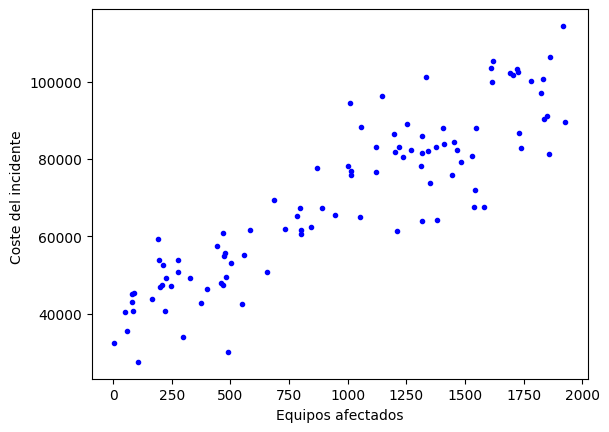

In [9]:
plt.plot(df['n_equipos_afectados'],df['coste'],"b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente ")
plt.show()

# Construcció del model


In [11]:
from sklearn.linear_model import LinearRegression

In [16]:
#construcio del mdel i ajustem la funció d'hipotesi
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1,1),df['coste'].values)

LinearRegression()

In [14]:
# parametre theta 0 (punt de tall)
lin_reg.intercept_

38600.73220995948

In [15]:
#paràmetre theta 1 (pendent)
lin_reg.coef_

array([32.13846132])

In [17]:
# predicció pel valor mínim i màxim del conjunt de dades d'entrenament
X_min_max = np.array([[df['n_equipos_afectados'].min()],[df['n_equipos_afectados'].max()]])
Y_train_pred = lin_reg.predict(X_min_max)

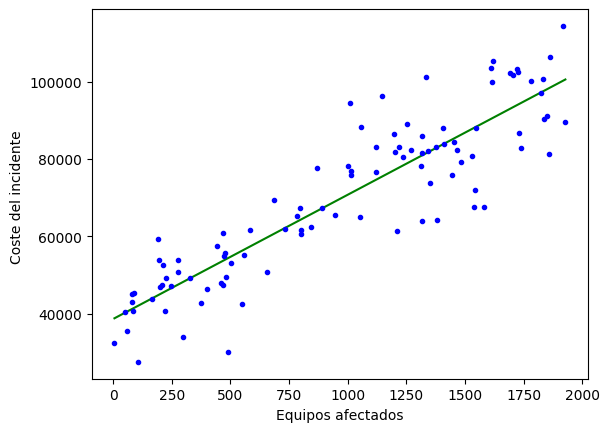

In [19]:
plt.plot(X_min_max,Y_train_pred,"g-")
plt.plot(df['n_equipos_afectados'],df['coste'],"b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente ")
plt.show()

# Prediccip de nous exemples


In [20]:
X_new = np.array([[1200]]) # 1200 equips afectats
#prediccio del cost que tindria
coste = lin_reg.predict(X_new)
print("El coste del incidente seria ",int(coste[0]), "€")

El coste del incidente seria  77166 €


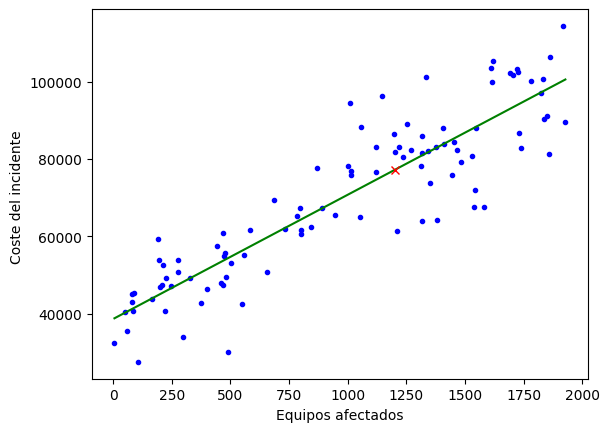

In [22]:
plt.plot(df['n_equipos_afectados'],df['coste'],"b.")
plt.plot(X_min_max,Y_train_pred,"g-")
plt.plot(X_new,coste,"rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente ")
plt.show()